# Integration Tests 

In [1]:
## Import the Forest-Guided Clustering package
from fgclustering import FgClustering

## Imports for datasets
from palmerpenguins import load_penguins
from sklearn.datasets import load_breast_cancer, load_iris, fetch_california_housing

## Additional imports for use-cases
import pandas as pd

from sklearn.datasets import make_classification, make_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Binary Classification: Breast Cancer Dataset

In [2]:
data_breast_cancer = load_breast_cancer(as_frame=True)
data_breast_cancer = data_breast_cancer.frame
data_breast_cancer['target'] = data_breast_cancer['target'].map({0: 'malignant', 1: 'benign'})

X_breast_cancer = data_breast_cancer.loc[:, data_breast_cancer.columns != 'target']
y_breast_cancer = data_breast_cancer.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_breast_cancer, y_breast_cancer)
rf_breast_cancer = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_breast_cancer.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9543057996485061


In [3]:
fgc = FgClustering(model=rf_breast_cancer, data=data_breast_cancer, target_column='target')
fgc.run(max_K=4)

Interpreting RandomForestClassifier


 33%|███▎      | 1/3 [00:00<00:01,  1.57it/s]

For number of cluster 2 the mean Jaccard Index across clusters is 0.9982165955036659
The stability of each cluster is:
  Cluster 1: Stability 0.99866
  Cluster 2: Stability 0.99778
For number of cluster 2 the score is 0.06613635989234057




 67%|██████▋   | 2/3 [00:01<00:00,  1.40it/s]

For number of cluster 3 the mean Jaccard Index across clusters is 0.9539316431266139
The stability of each cluster is:
  Cluster 1: Stability 0.88618
  Cluster 2: Stability 0.99101
  Cluster 3: Stability 0.98460
For number of cluster 3 the score is 0.07478999977783318




100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

For number of cluster 4 the mean Jaccard Index across clusters is 0.8190046771290219
The stability of each cluster is:
  Cluster 1: Stability 0.89626
  Cluster 2: Stability 0.89685
  Cluster 3: Stability 0.97927
  Cluster 4: Stability 0.50365
For number of cluster 4 the score is 0.1105881447883692


Optimal number of cluster is: 2


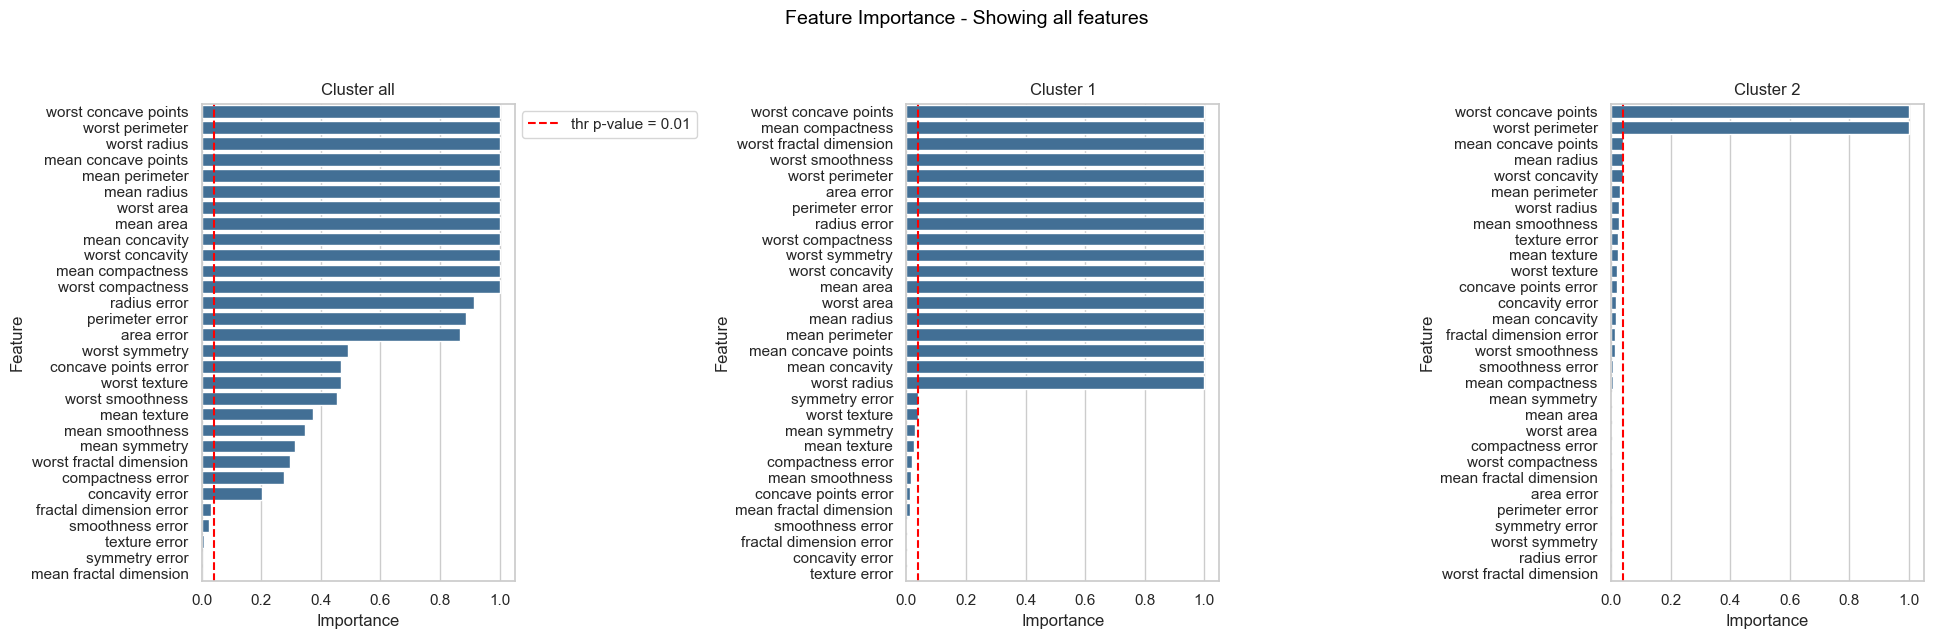

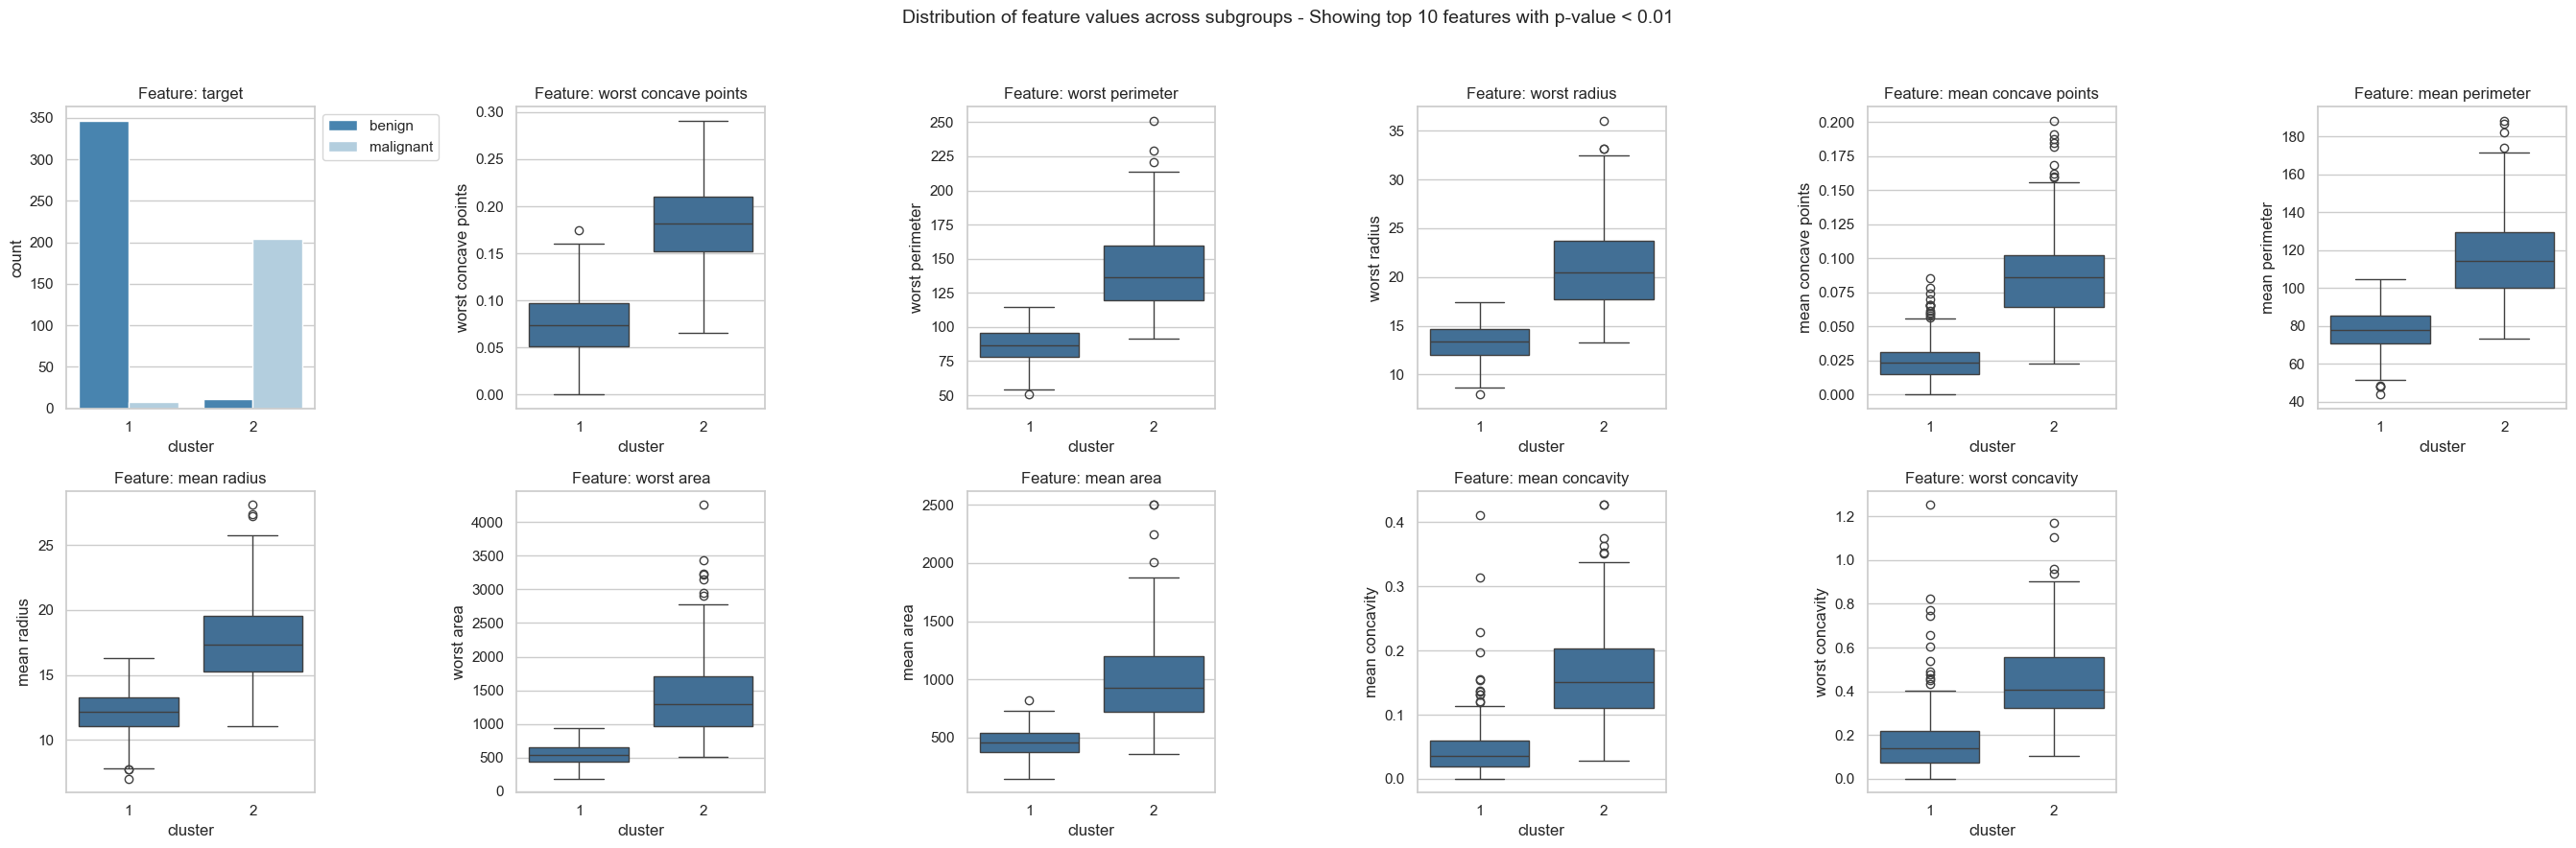

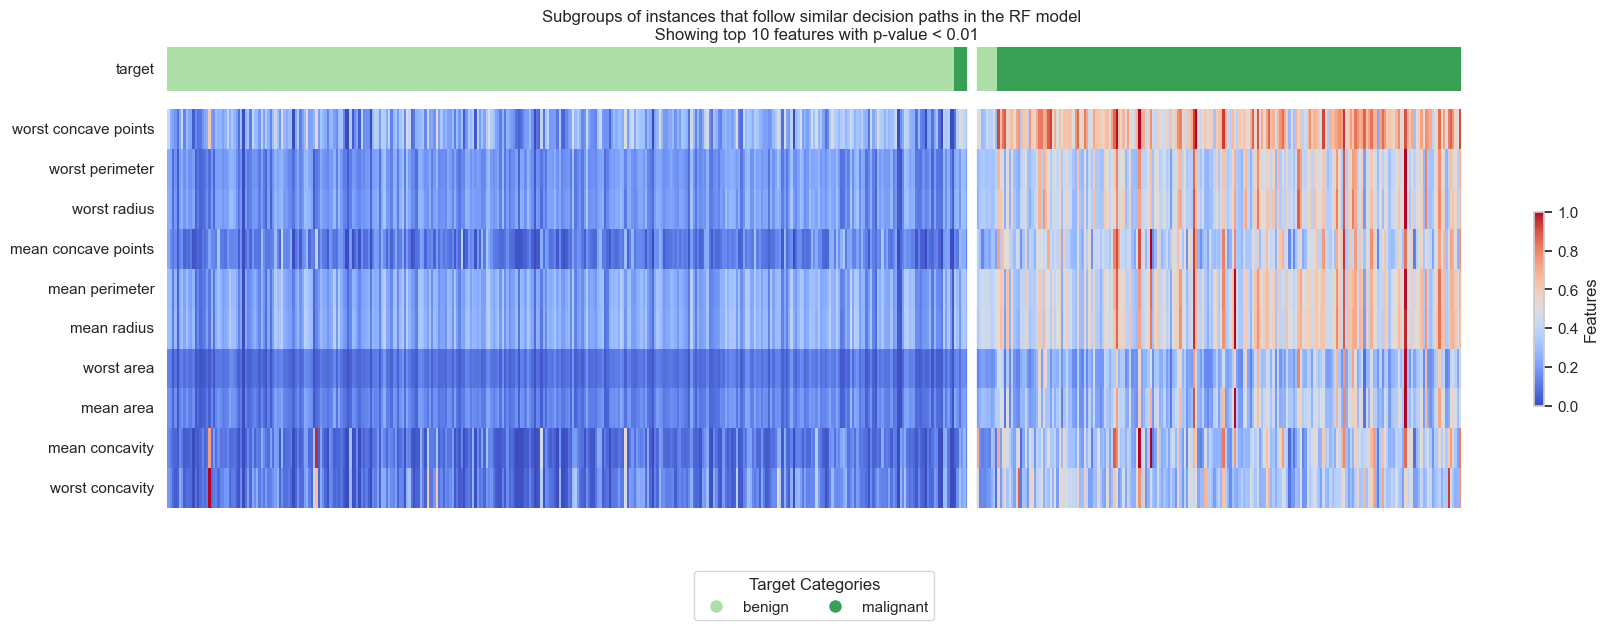

In [4]:
fgc.plot_feature_importance(thr_pvalue=0.01)
fgc.plot_decision_paths(thr_pvalue=0.01, top_n=10, num_cols=6)

## Multiclass Classification: Iris Dataset

In [5]:
data_iris = load_iris(as_frame=True)
data_iris = data_iris.frame
data_iris['target'] = data_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

X_iris = data_iris.loc[:, data_iris.columns != 'target']
y_iris = data_iris.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_iris, y_iris)
rf_iris = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_iris.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9533333333333334


In [6]:
fgc = FgClustering(model=rf_iris, data=data_iris, target_column='target')
fgc.run()

Interpreting RandomForestClassifier


 50%|█████     | 2/4 [00:00<00:00, 16.15it/s]

For number of cluster 2 the mean Jaccard Index across clusters is 0.6035602325153644
Clustering is instable, no score computed!


For number of cluster 3 the mean Jaccard Index across clusters is 1.0
The stability of each cluster is:
  Cluster 1: Stability 1.00000
  Cluster 2: Stability 1.00000
  Cluster 3: Stability 1.00000
For number of cluster 3 the score is 0.0630091172123111


For number of cluster 4 the mean Jaccard Index across clusters is 0.8116885444475497
The stability of each cluster is:
  Cluster 1: Stability 0.89115
  Cluster 2: Stability 1.00000
  Cluster 3: Stability 0.93552
  Cluster 4: Stability 0.42008
For number of cluster 4 the score is 0.11057086146949352




100%|██████████| 4/4 [00:00<00:00, 11.12it/s]

For number of cluster 5 the mean Jaccard Index across clusters is 0.7559585545602321
The stability of each cluster is:
  Cluster 1: Stability 0.75958
  Cluster 2: Stability 1.00000
  Cluster 3: Stability 0.93303
  Cluster 4: Stability 0.40768
  Cluster 5: Stability 0.67950
For number of cluster 5 the score is 0.09240634195337258


Optimal number of cluster is: 3


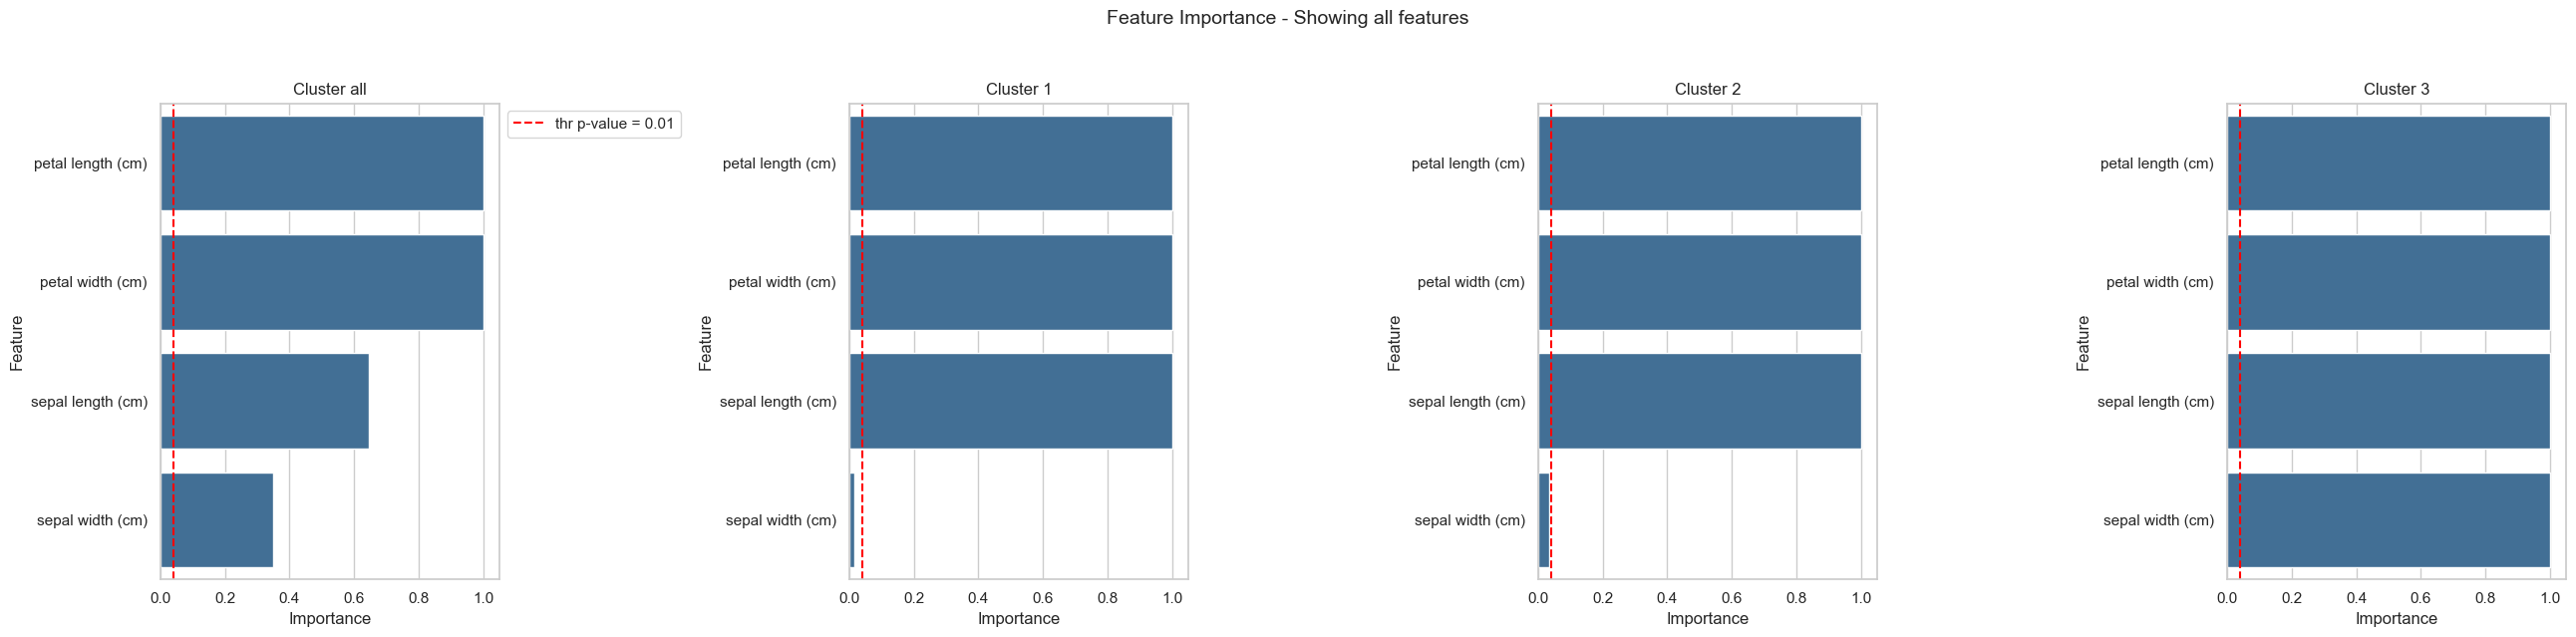

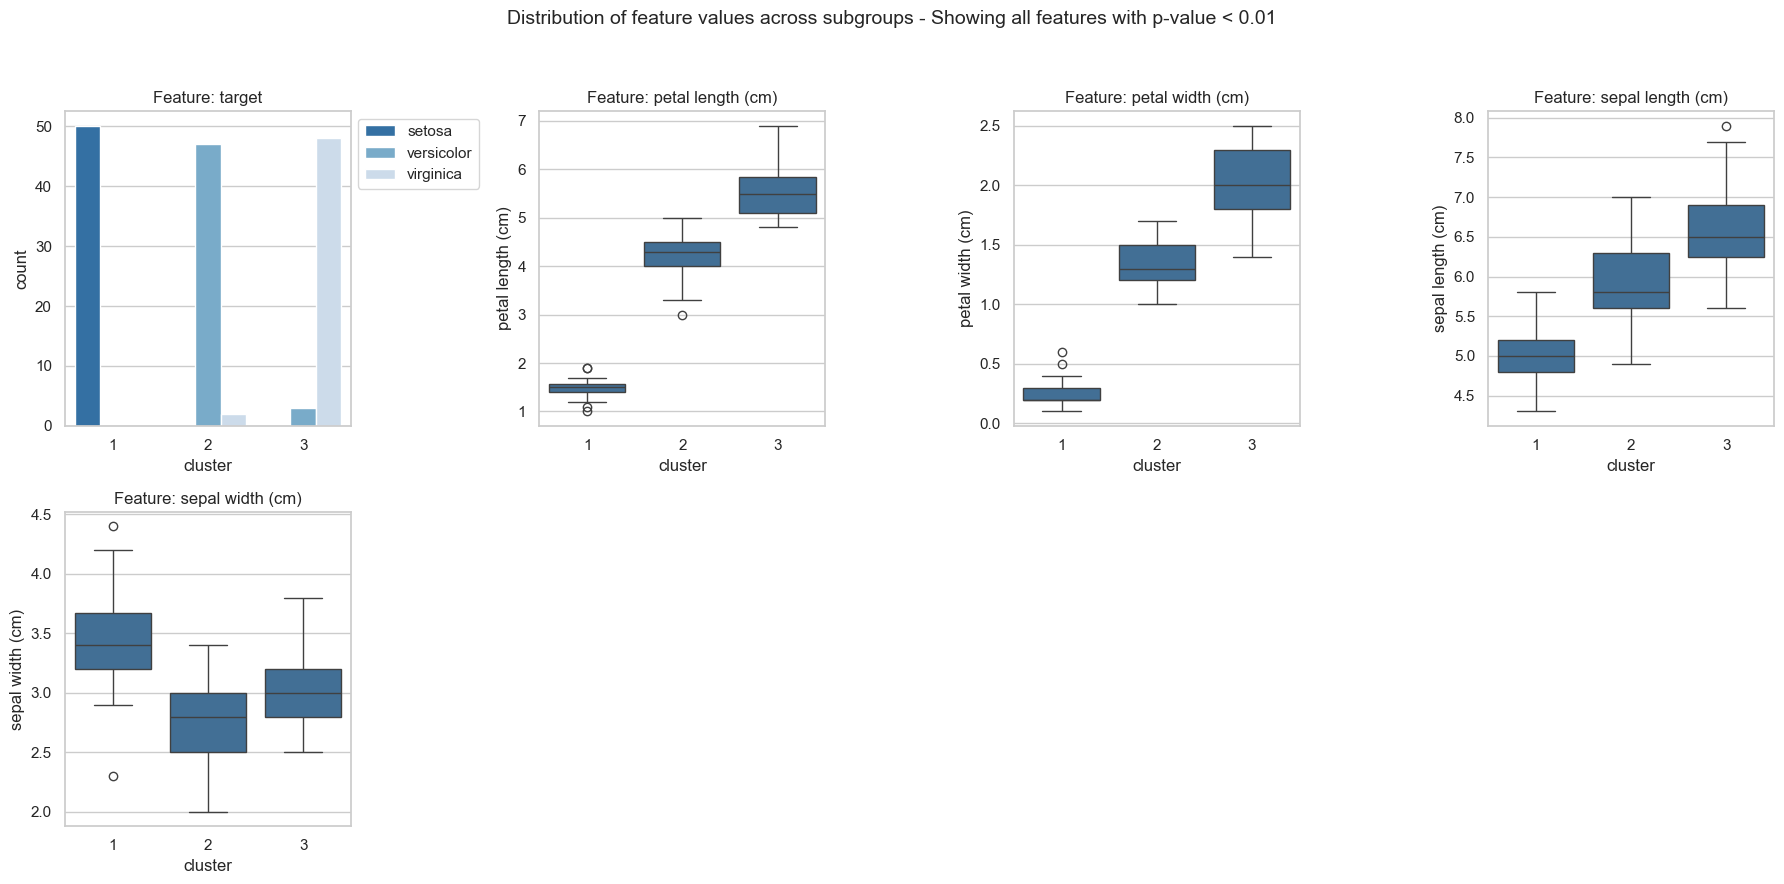

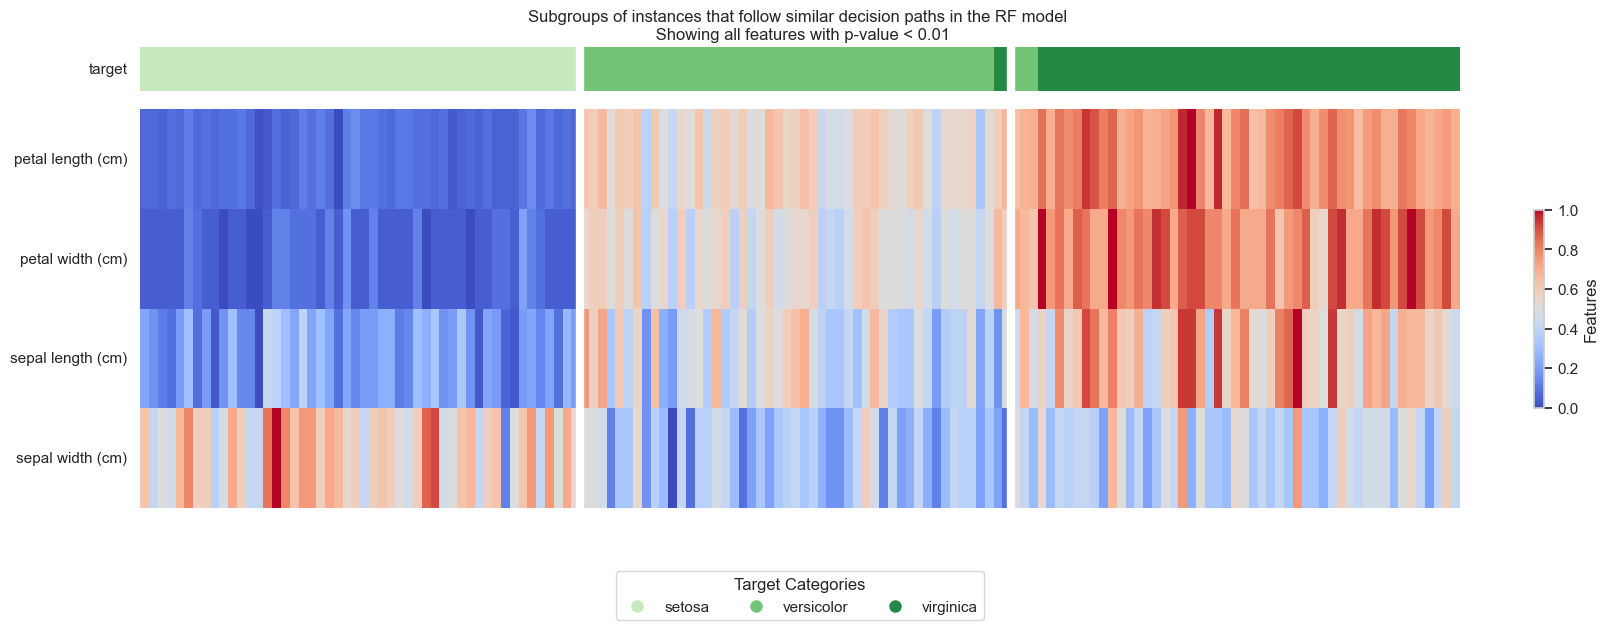

In [7]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=4)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=4)

## Multiclass Classification: Penguins Dataset

In [8]:
data_penguins = load_penguins()
data_penguins.rename(columns={'species':'target'}, inplace=True)

# Remove the instances with missing values and check how many we are left with
print(f"Before omiting the missing values the dataset has {data_penguins.shape[0]} instances")
data_penguins.dropna(inplace=True)
print(f"After omiting the missing values the dataset has {data_penguins.shape[0]} instances")

# preprocess categorical features such that they can be used for the RF model
data_penguins_encoded = pd.get_dummies(data_penguins, columns=['island', 'sex'], prefix=['island', 'sex'], drop_first=True)

X_penguins = data_penguins_encoded.loc[:, data_penguins_encoded.columns != 'target']
y_penguins = data_penguins_encoded.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_penguins, y_penguins)
rf_penguins = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_penguins.oob_score_)

Before omiting the missing values the dataset has 344 instances
After omiting the missing values the dataset has 333 instances
Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.984984984984985


In [9]:
fgc = FgClustering(model=rf_penguins, data=data_penguins_encoded, target_column='target')
fgc.run()

Interpreting RandomForestClassifier


 25%|██▌       | 1/4 [00:00<00:00,  6.07it/s]

For number of cluster 2 the mean Jaccard Index across clusters is 0.9254758915915404
The stability of each cluster is:
  Cluster 1: Stability 0.93492
  Cluster 2: Stability 0.91603
For number of cluster 2 the score is 0.32933697175607646




 50%|█████     | 2/4 [00:00<00:00,  4.51it/s]

For number of cluster 3 the mean Jaccard Index across clusters is 0.9959797061817354
The stability of each cluster is:
  Cluster 1: Stability 0.99649
  Cluster 2: Stability 0.99616
  Cluster 3: Stability 0.99529
For number of cluster 3 the score is 0.018666445142142996




 75%|███████▌  | 3/4 [00:00<00:00,  3.55it/s]

For number of cluster 4 the mean Jaccard Index across clusters is 0.9868524458213912
The stability of each cluster is:
  Cluster 1: Stability 0.97187
  Cluster 2: Stability 0.97554
  Cluster 3: Stability 1.00000
  Cluster 4: Stability 1.00000
For number of cluster 4 the score is 0.07721157852502875




100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

For number of cluster 5 the mean Jaccard Index across clusters is 0.7896866769270794
The stability of each cluster is:
  Cluster 1: Stability 0.95902
  Cluster 2: Stability 0.54286
  Cluster 3: Stability 0.79326
  Cluster 4: Stability 1.00000
  Cluster 5: Stability 0.65329
For number of cluster 5 the score is 0.025349233777777824


Optimal number of cluster is: 3


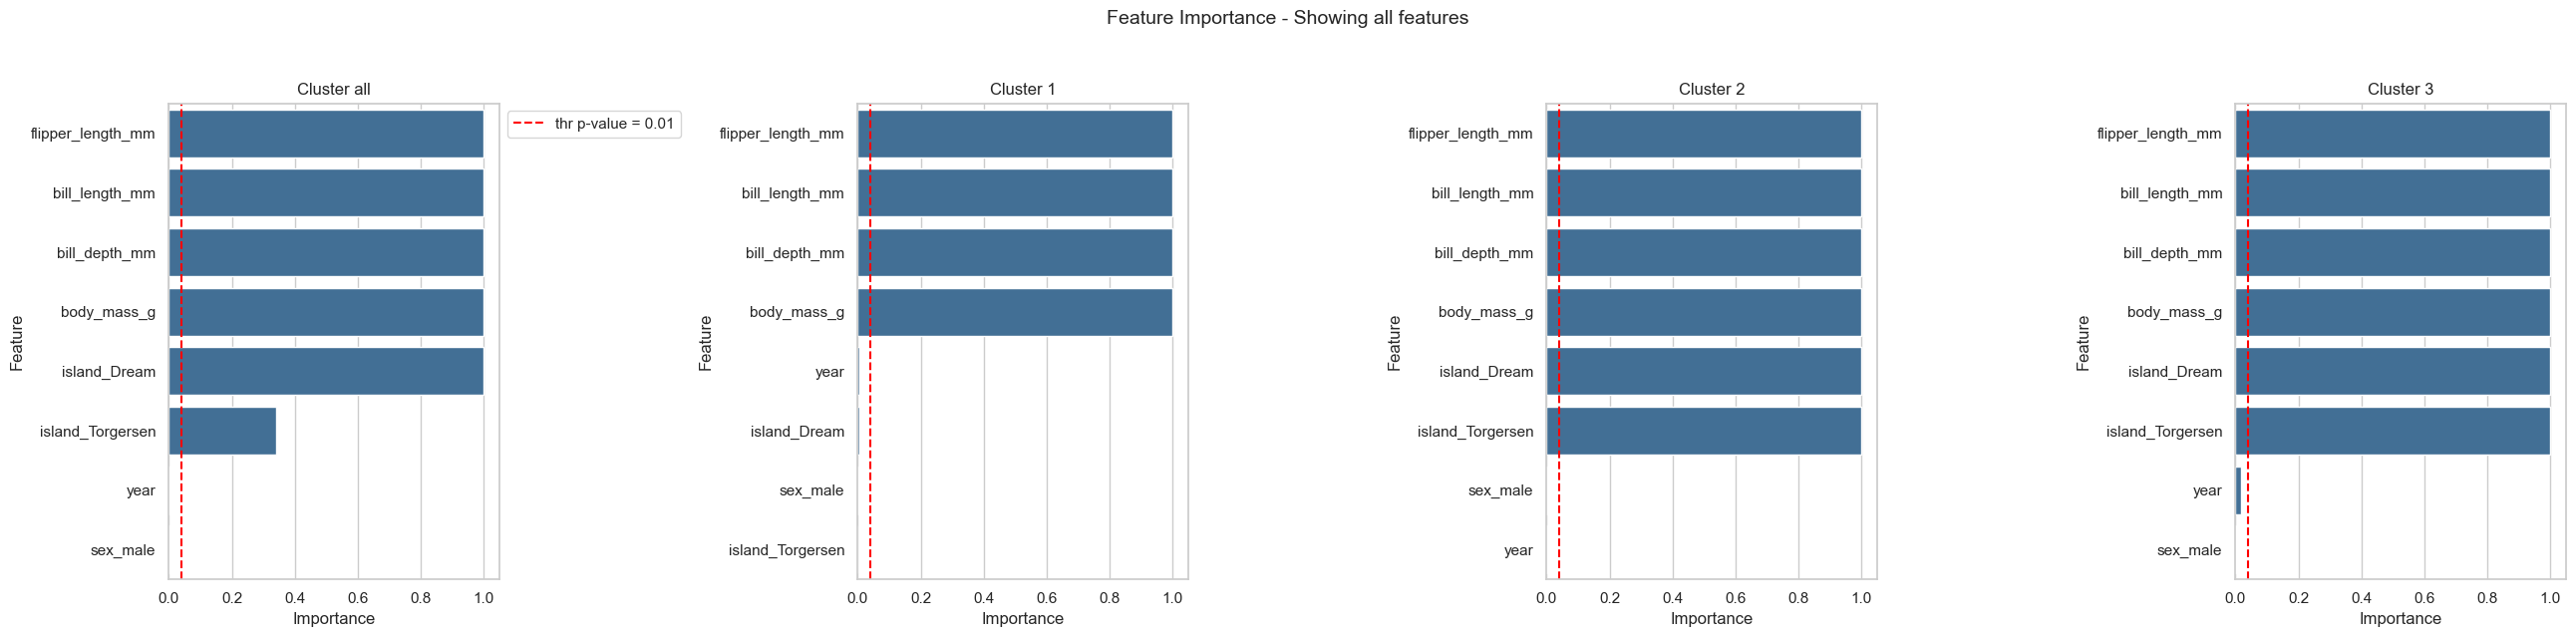

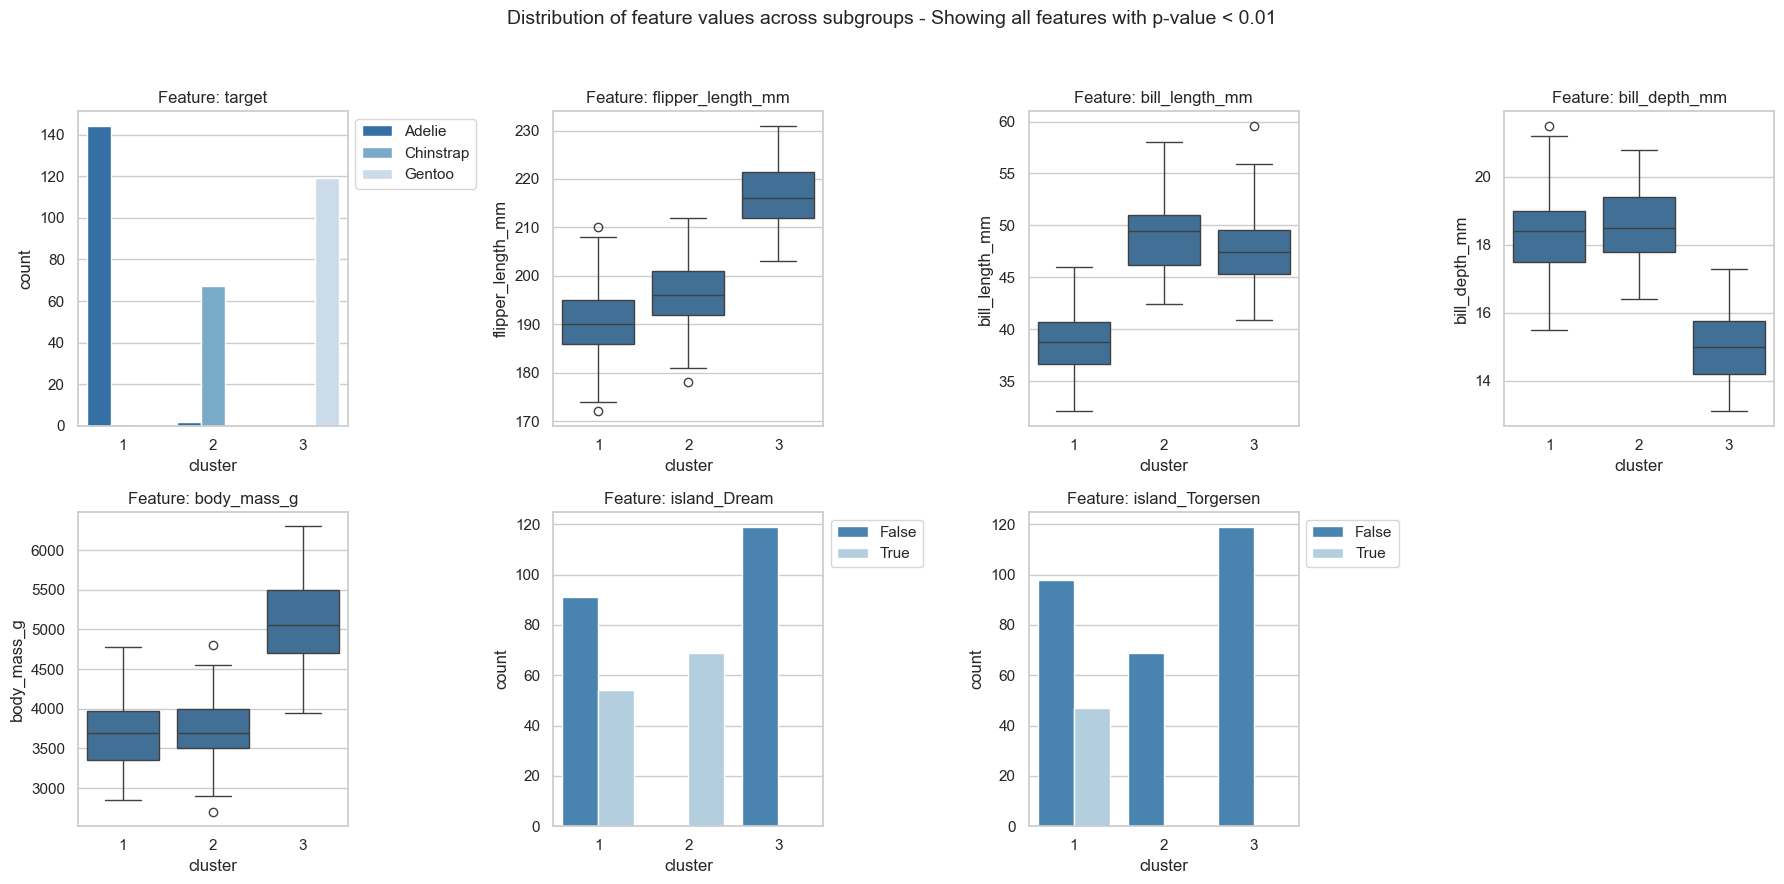

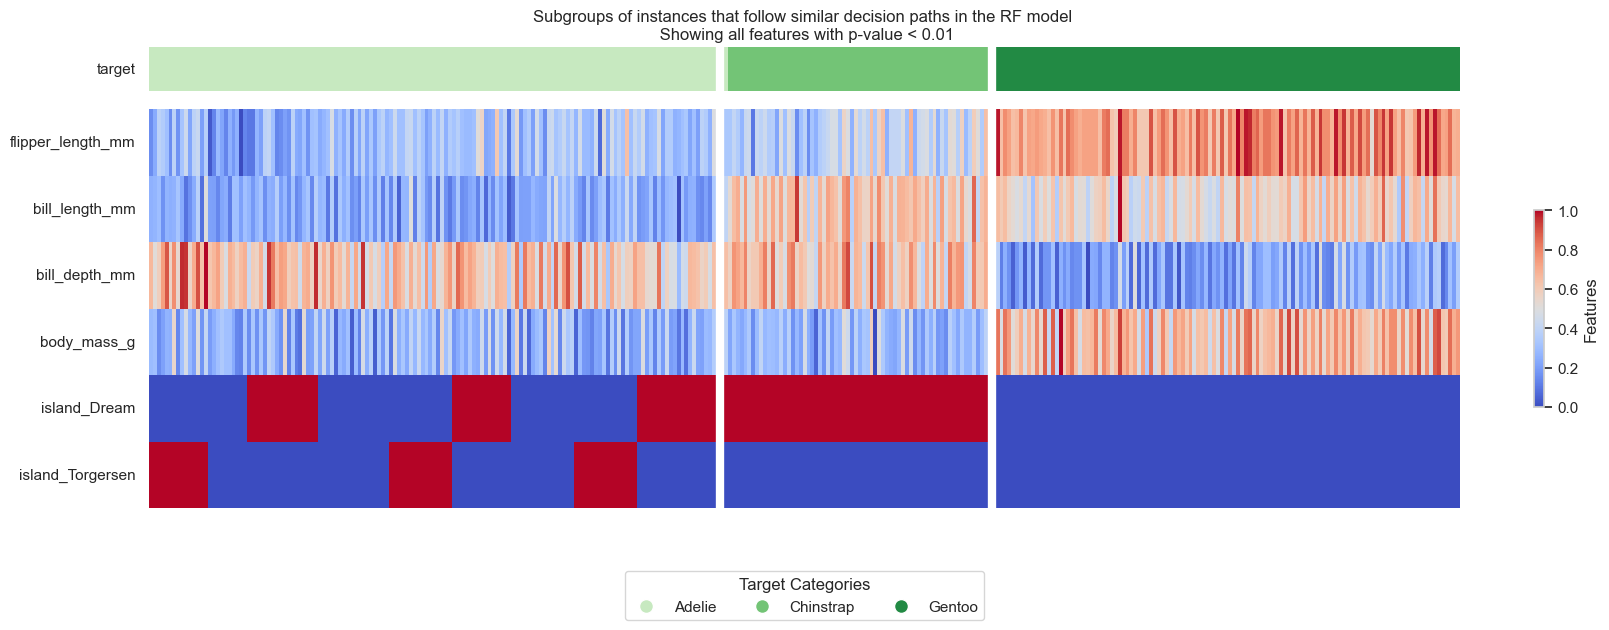

In [10]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=4)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=4)

In [11]:
X = data_penguins.drop('target', axis=1)
X['island'] = X['island'].astype('category')
X['sex'] = X['sex'].astype('category')

fgc.calculate_statistics(X, target_column=data_penguins.target)

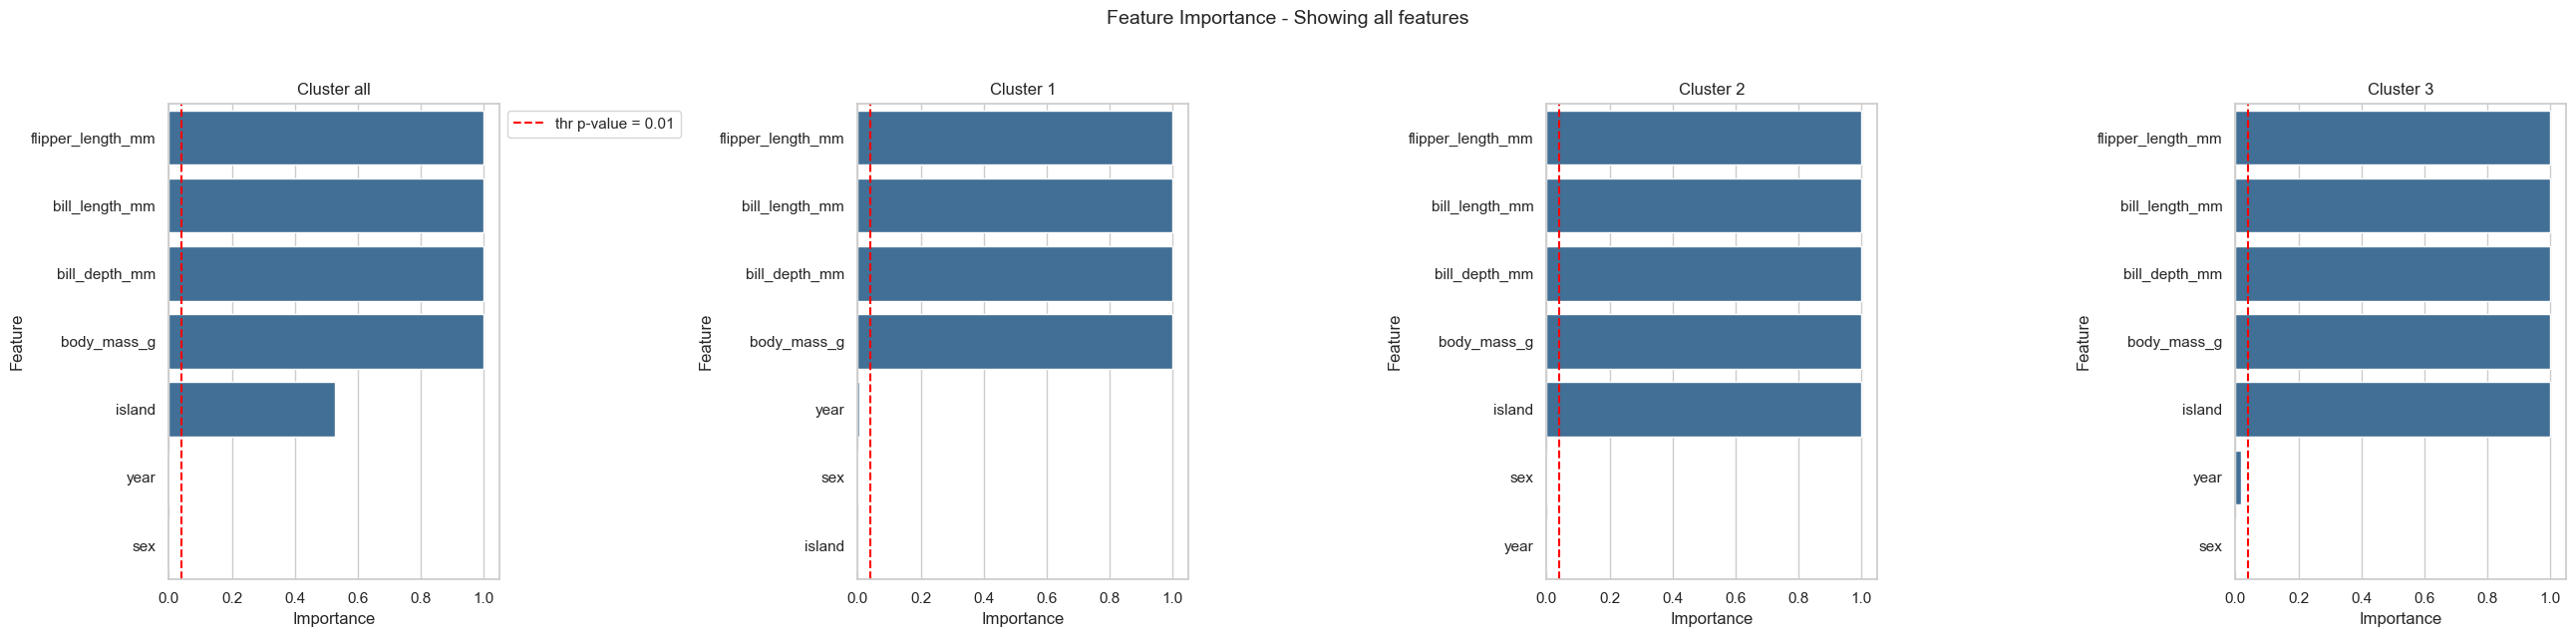

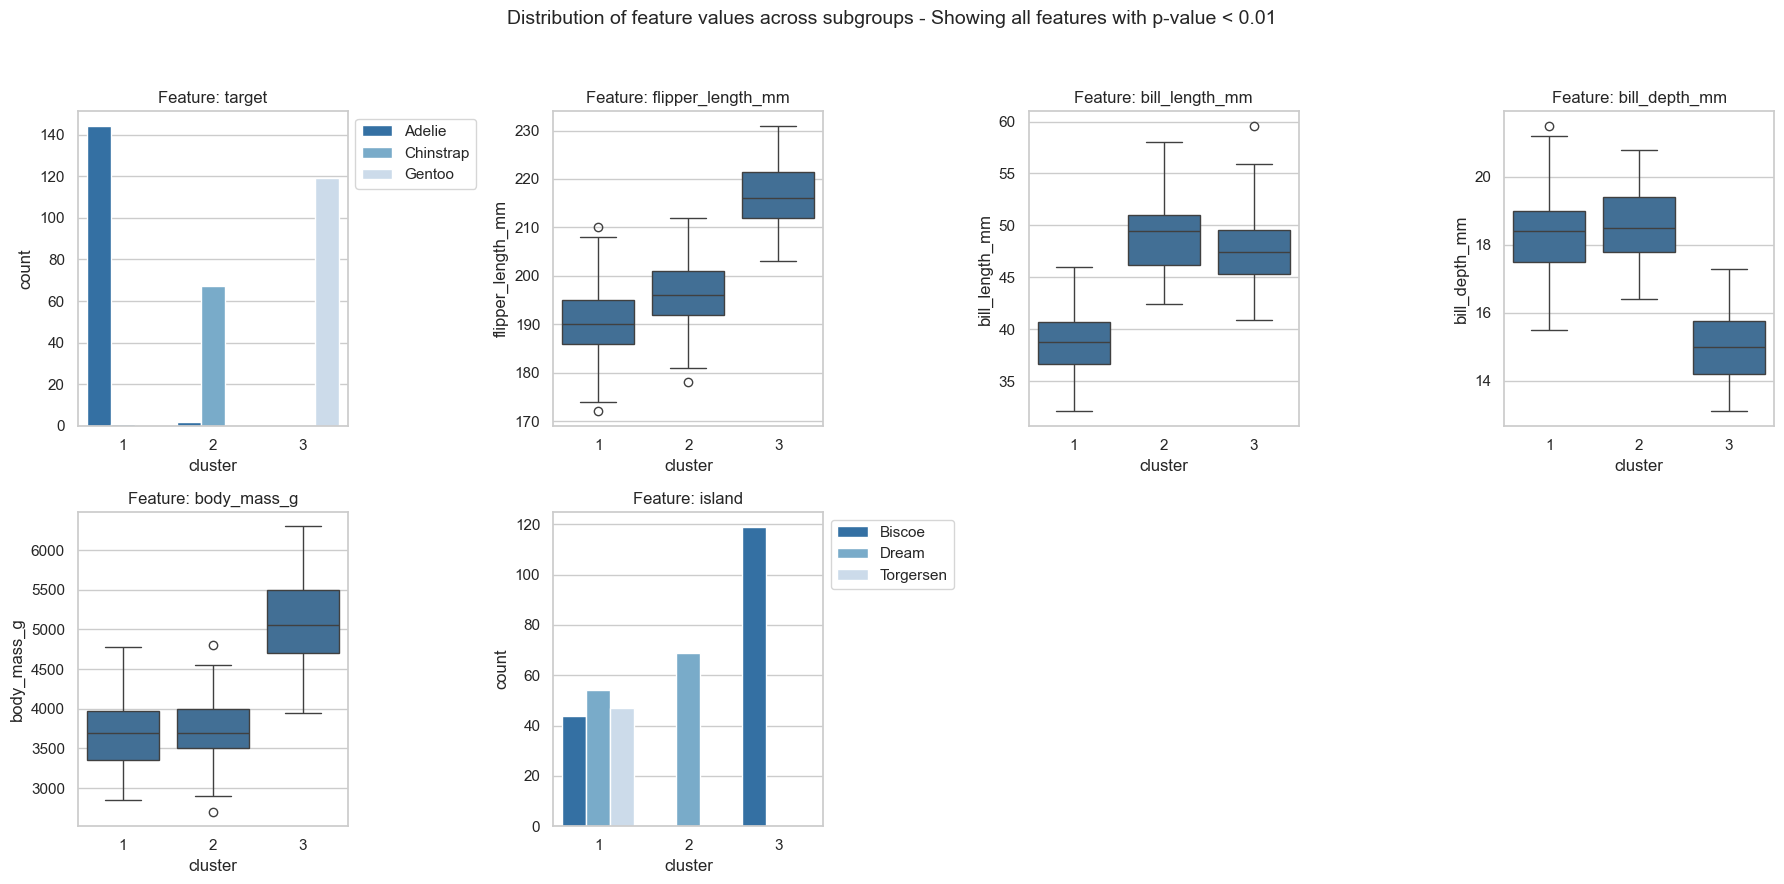

In [12]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=4)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=4, heatmap_type="interactive")

## Regression: California Housing Dataset

In [13]:
data_housing = fetch_california_housing(as_frame=True)
data_housing = data_housing.frame
data_housing.rename(columns={'MedHouseVal':'target'}, inplace=True)

# for sake of runtime we only use the first 3000 samples
data_housing = data_housing[:3000]
data_housing.head()

X_housing = data_housing.loc[:, data_housing.columns != 'target']
y_housing = data_housing.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestRegressor(n_estimators=100, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_housing, y_housing)
rf_housing = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB R^2 of prediction model:')
print(rf_housing.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'log2'}
OOB R^2 of prediction model:
0.8143895694575555


In [14]:
fgc = FgClustering(model=rf_housing, data=data_housing, target_column='target')
fgc.run(method_clustering='pam', init_clustering='random', n_jobs=6, discart_value_JI=0.7)

Interpreting RandomForestRegressor


 25%|██▌       | 1/4 [00:06<00:18,  6.25s/it]

For number of cluster 2 the mean Jaccard Index across clusters is 0.884123444212874
The stability of each cluster is:
  Cluster 1: Stability 0.91353
  Cluster 2: Stability 0.85472
For number of cluster 2 the score is 2647.0841058748933




 50%|█████     | 2/4 [00:12<00:13,  6.51s/it]

For number of cluster 3 the mean Jaccard Index across clusters is 0.8776281672764048
The stability of each cluster is:
  Cluster 1: Stability 0.95053
  Cluster 2: Stability 0.82976
  Cluster 3: Stability 0.85259
For number of cluster 3 the score is 2397.9829201428356




 75%|███████▌  | 3/4 [00:23<00:08,  8.14s/it]

For number of cluster 4 the mean Jaccard Index across clusters is 0.7187397925523619
The stability of each cluster is:
  Cluster 1: Stability 0.75524
  Cluster 2: Stability 0.51595
  Cluster 3: Stability 0.85506
  Cluster 4: Stability 0.74870
For number of cluster 4 the score is 2266.7606374339584




100%|██████████| 4/4 [00:36<00:00,  9.23s/it]

For number of cluster 5 the mean Jaccard Index across clusters is 0.6701767046776143
Clustering is instable, no score computed!


Optimal number of cluster is: 4


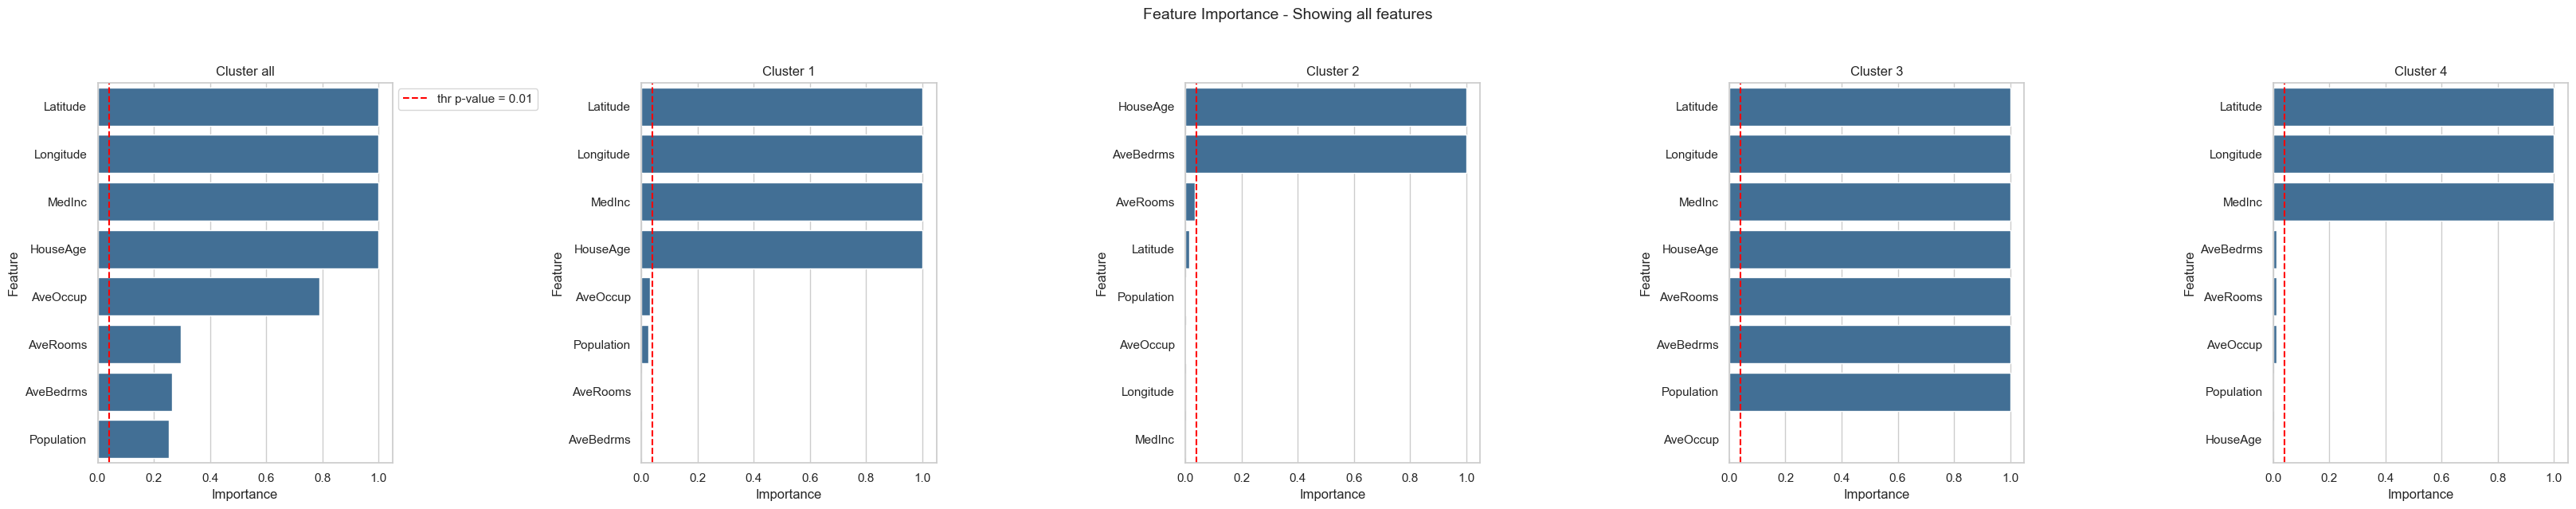

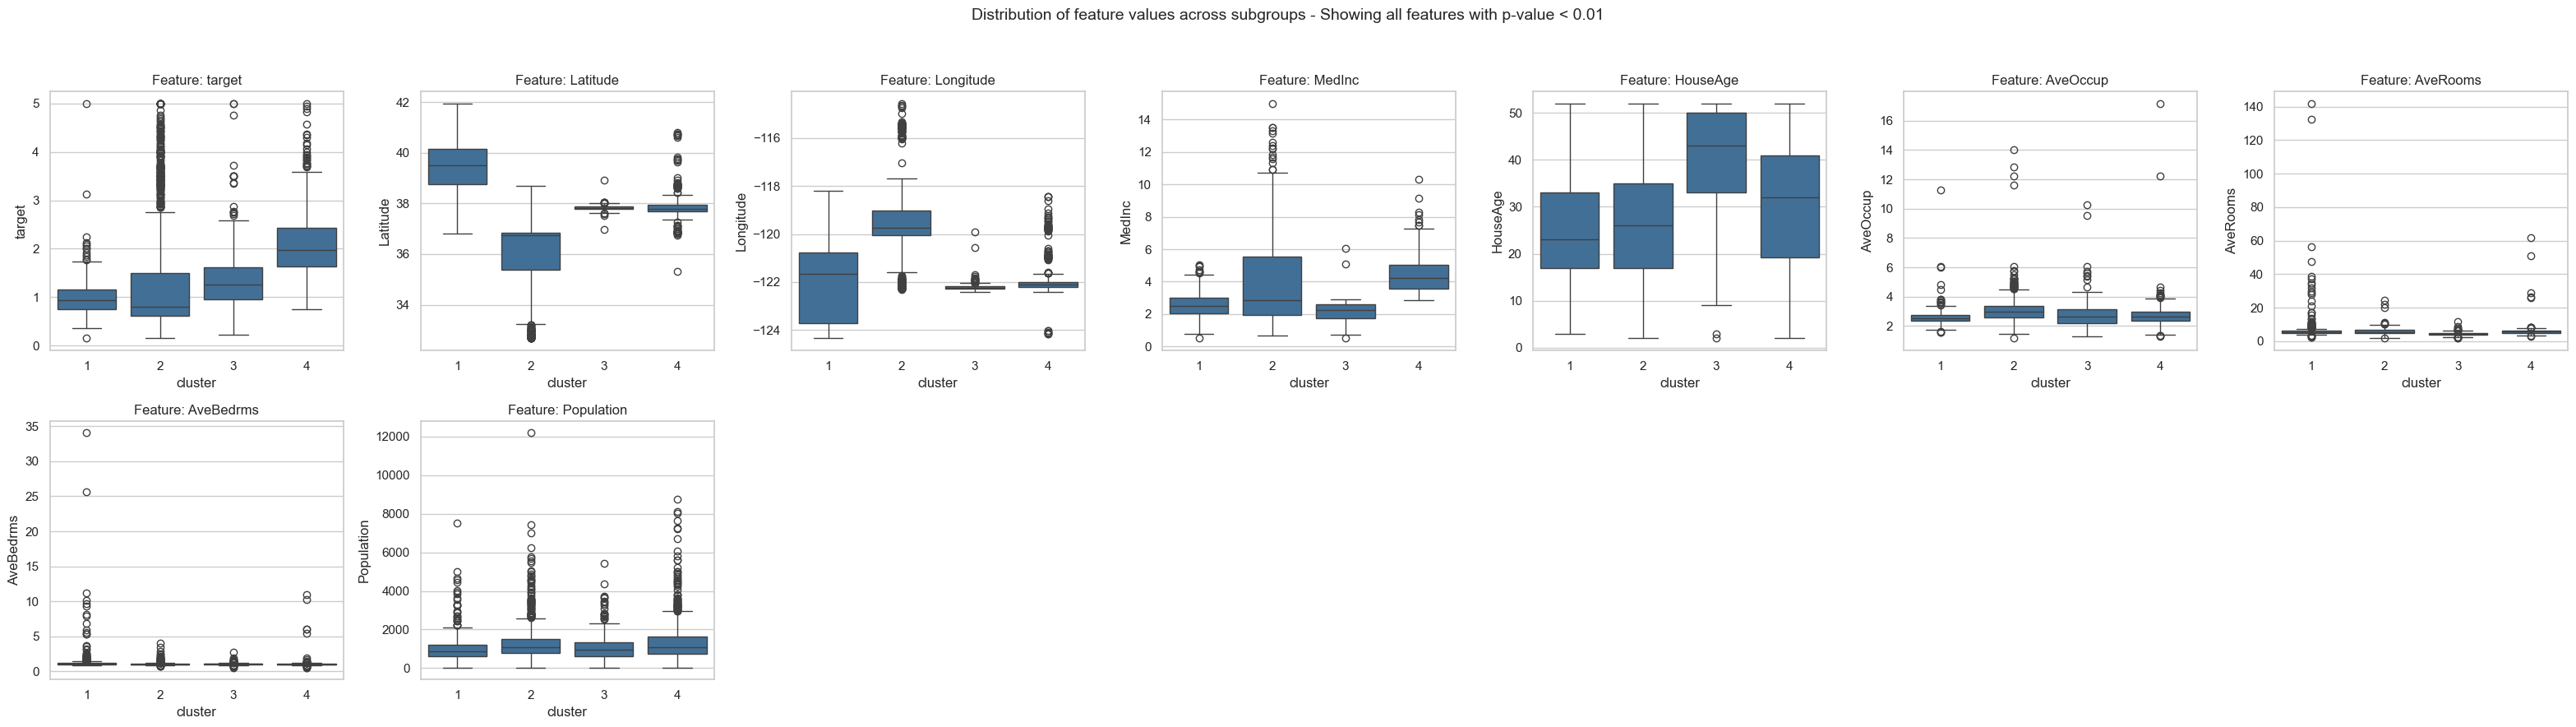

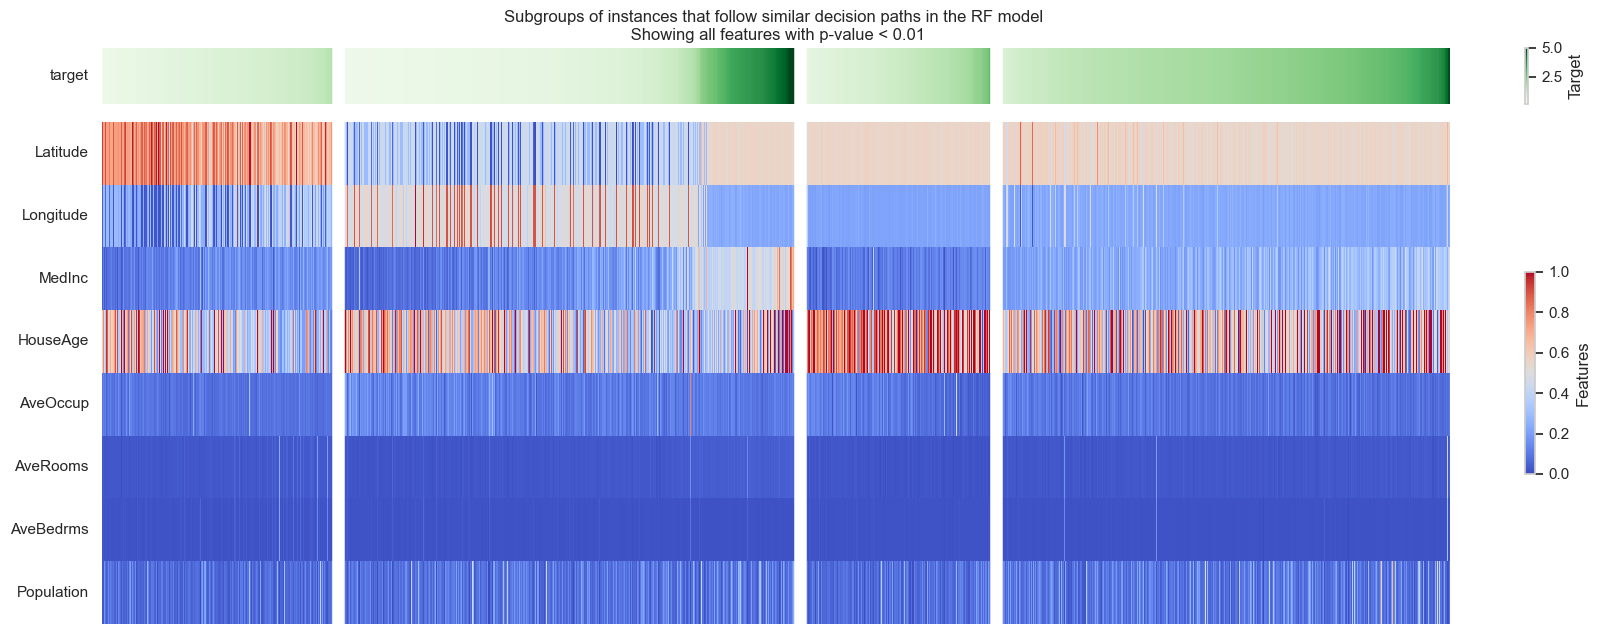

In [15]:
fgc.plot_feature_importance(thr_pvalue=0.01, num_cols=7)
fgc.plot_decision_paths(thr_pvalue=0.01, num_cols=7)

In [16]:
fgc_fast = FgClustering(model=rf_housing, data=data_housing, target_column='target')
fgc_fast.run(method_clustering='alternate', init_clustering='random', n_jobs=6)

Interpreting RandomForestRegressor


 25%|██▌       | 1/4 [00:01<00:04,  1.35s/it]

For number of cluster 2 the mean Jaccard Index across clusters is 0.9192235490887075
The stability of each cluster is:
  Cluster 1: Stability 0.93676
  Cluster 2: Stability 0.90169
For number of cluster 2 the score is 1909.6995878481864




 50%|█████     | 2/4 [00:02<00:02,  1.38s/it]

For number of cluster 3 the mean Jaccard Index across clusters is 0.731322828127448
The stability of each cluster is:
  Cluster 1: Stability 0.59110
  Cluster 2: Stability 0.93907
  Cluster 3: Stability 0.66379
For number of cluster 3 the score is 1997.8183905229025




 75%|███████▌  | 3/4 [00:04<00:01,  1.49s/it]

For number of cluster 4 the mean Jaccard Index across clusters is 0.5761031385251958
Clustering is instable, no score computed!




100%|██████████| 4/4 [00:05<00:00,  1.45s/it]

For number of cluster 5 the mean Jaccard Index across clusters is 0.5993525020762265
Clustering is instable, no score computed!


Optimal number of cluster is: 2


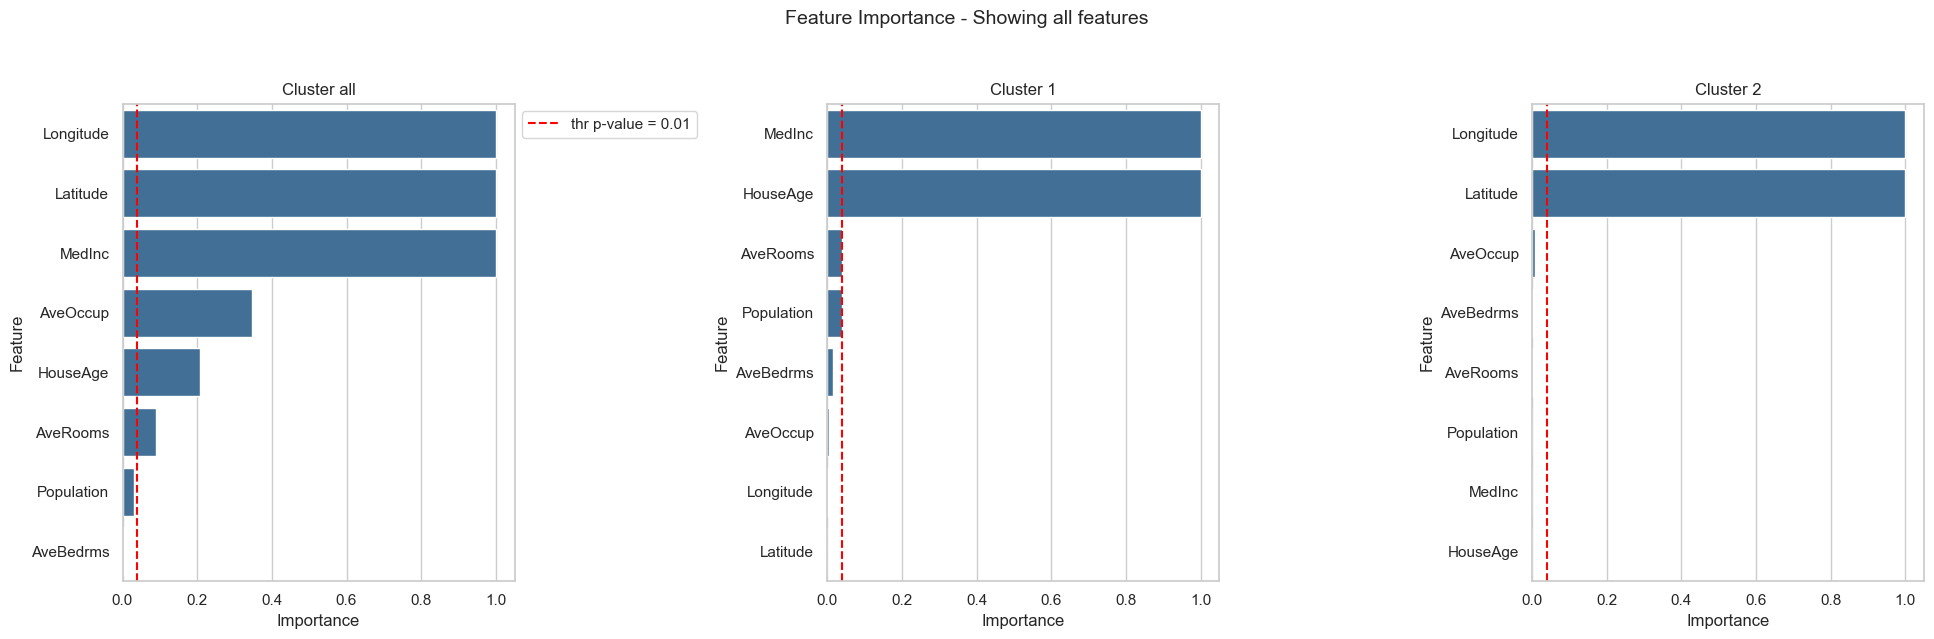

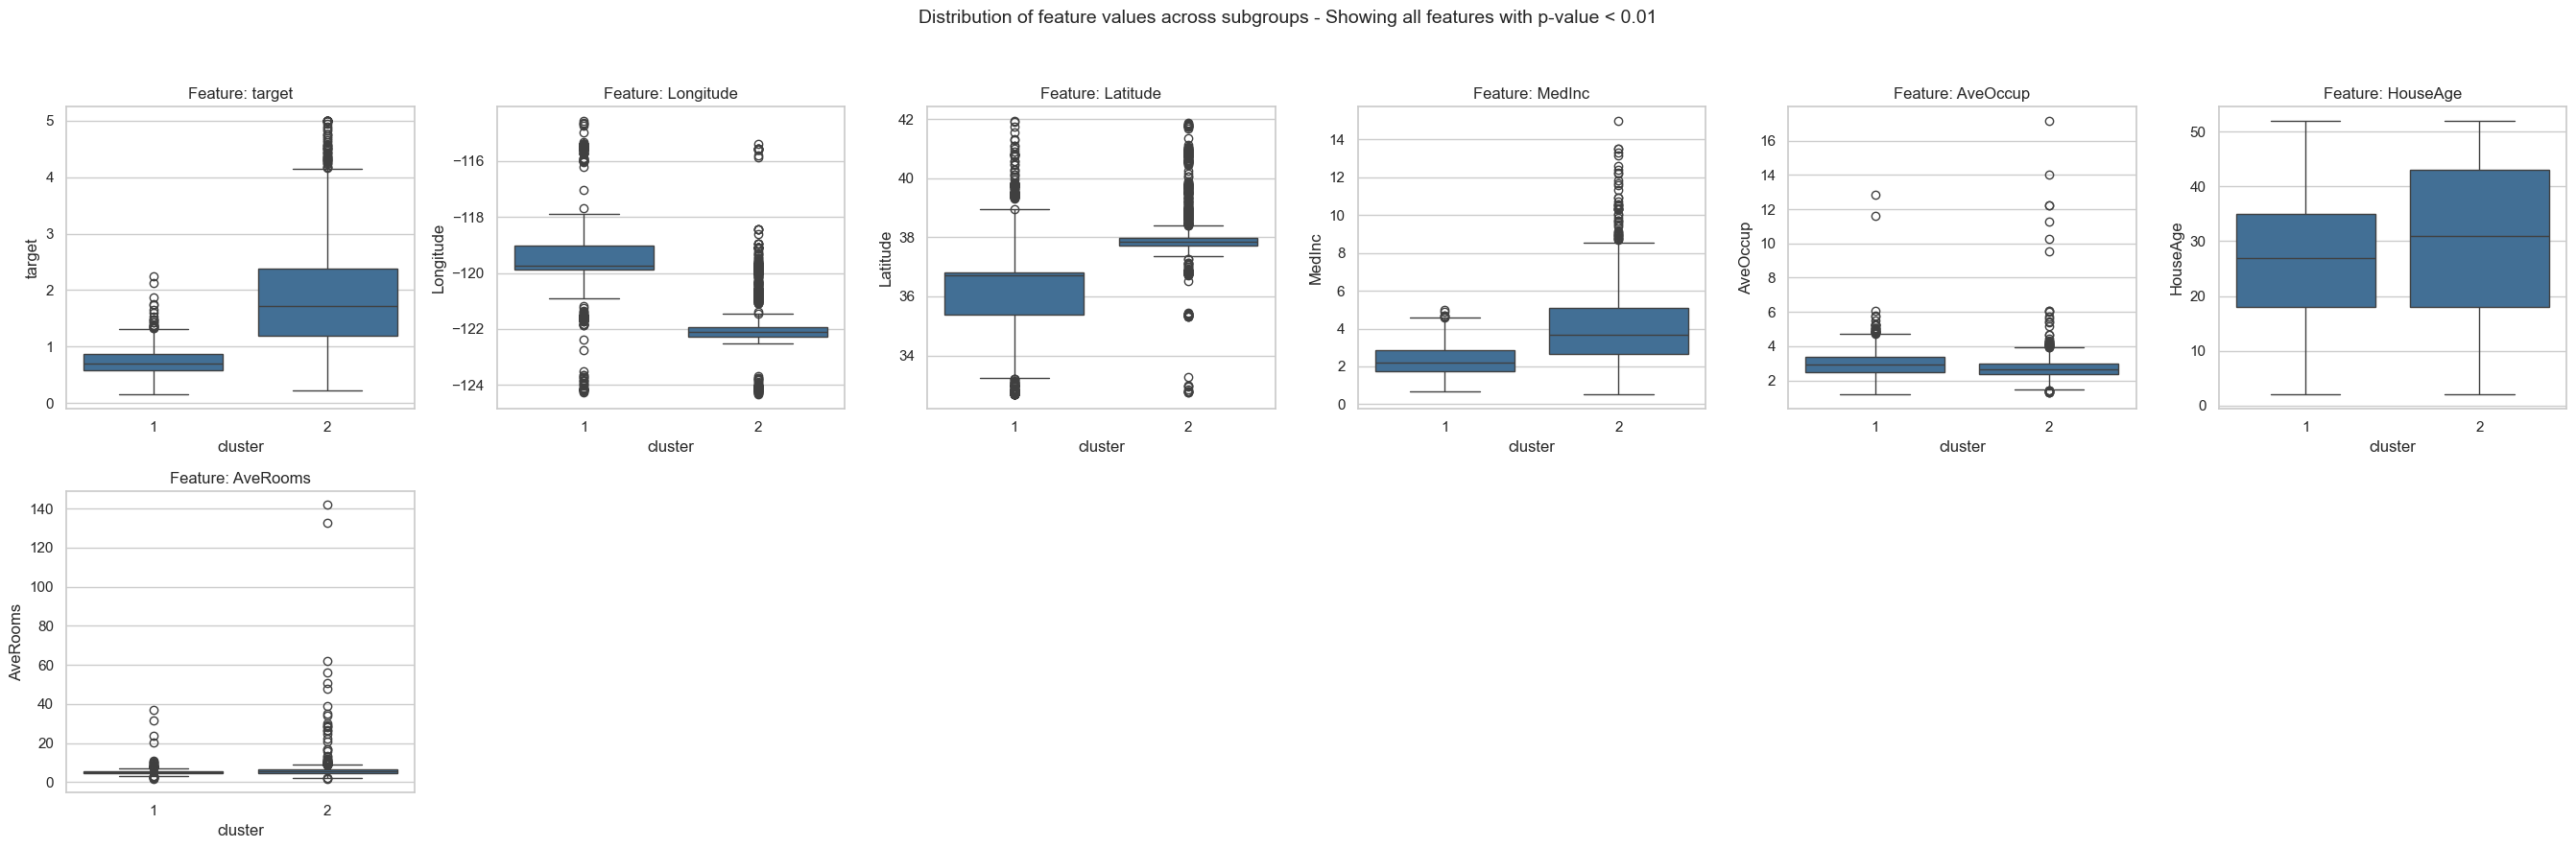

In [17]:
fgc_fast.plot_feature_importance(thr_pvalue=0.01)
fgc_fast.plot_decision_paths(thr_pvalue=0.01, heatmap_type="interactive")